In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [84]:
df = pd.read_json("/Users/keiserkek/Desktop/transaction-data-adhoc-analysis.json")
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [104]:
item_df = df.assign(transaction_items=df.transaction_items.str.split(";")).explode('transaction_items').reset_index(drop=True)
item_df['quantity'] = item_df["transaction_items"].apply(lambda x: int(x.split(',')[-1].strip('(x)')))

item_df["transaction_items"] = item_df["transaction_items"].apply(lambda lst: lst[:-5])
item_df['transaction_value'] = item_df['quantity'] * item_df['transaction_items'].apply(lambda x: value_df.loc[x])

item_df['transaction_date'] = pd.to_datetime(item_df["transaction_date"], format="%Y/%m/%d")
item_df['month'] = item_df['transaction_date'].dt.month

item_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantity,month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196.0,2022-01-12,4,1
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon",3897.0,2022-01-12,3,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk",7960.0,2022-01-12,4,1
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans",199.0,2022-01-12,1,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins",4500.0,2022-01-08,3,1
...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk",3980.0,2022-06-09,2,6
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms",300.0,2022-06-09,2,6
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk",1990.0,2022-06-03,1,6
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms",450.0,2022-06-03,3,6


In [108]:
import string
value_df = df
value_df = value_df.assign(transaction_items=value_df.transaction_items.str.split(";"))

value_df = value_df[value_df["transaction_items"].apply(len)==1]
value_df["transaction_items"] = value_df["transaction_items"].apply(lambda lst: lst[0])

value_df['quantities'] = value_df["transaction_items"].apply(lambda x: int(x.split(',')[-1].strip('(x)')))
value_df["transaction_items"] = value_df["transaction_items"].apply(lambda lst: lst[:-5])

value_df = value_df.drop_duplicates(subset="transaction_items", keep="first")

product_labels = list(value_df['transaction_items'].values)
value_df = value_df['transaction_value'] / value_df['quantities']
value_df.index = product_labels

value_df

Exotic Extras,Beef Chicharon        1299.0
HealthyKid 3+,Yummy Vegetables       500.0
Exotic Extras,Kimchi and Seaweed     799.0
Candy City,Gummy Worms               150.0
HealthyKid 3+,Gummy Vitamins        1500.0
HealthyKid 3+,Nutrional Milk        1990.0
Candy City,Orange Beans              199.0
dtype: float64

In [99]:
frequency_df = item_df[['name','quantity']]
frequency_df["month"] = item_df.transaction_date.dt.month
customer_frequency_table = pd.pivot_table(
    frequency_df, 
    values='quantity', 
    index='month', 
    columns ='name', 
    aggfunc=sum, 
    fill_value=0
)

customer_frequency_table

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
month,,,,,,,,,,,,,,,,,,,,,
1,0,4,0,1,6,0,11,11,8,0,...,17,0,13,16,0,7,6,24,0,8
2,0,6,0,7,1,11,15,3,15,13,...,15,1,15,10,0,6,9,23,0,17
3,0,1,20,9,0,0,5,0,6,9,...,14,0,3,19,14,3,16,19,0,7
4,9,9,14,12,15,1,8,5,0,4,...,27,5,15,31,6,2,5,14,4,12
5,8,0,8,12,15,7,0,0,7,8,...,8,13,9,31,7,14,10,0,4,23
6,1,13,1,0,12,0,1,16,7,6,...,10,4,5,40,9,19,8,0,10,5


In [100]:
repeater = customer_frequency_table.apply(lambda x: [0 if i==1 else (1 if x[i-1] and x[i] else 0)for i in x.index]).transpose().sum()
inactive = customer_frequency_table.apply(lambda x: [0 if i==1 else ((1 if x[i]==0 else 0) if any(x[:i]) else 0) for i in x.index]).transpose().sum()
engaged = customer_frequency_table.apply(lambda x: [1 if all(x[:i]) else 0 for i in x.index]).transpose().sum()

customer_activity_status = pd.DataFrame({'Repeater': repeater, 'Inactive': inactive, 'Engaged': engaged})

customer_activity_status

,Repeater,Inactive,Engaged
month,,,
1,0,0,6588
2,5172,1416,5172
3,5216,1747,4126
4,5154,1909,3289
5,5110,1917,2667
6,5193,1835,2190


<AxesSubplot:xlabel='month'>

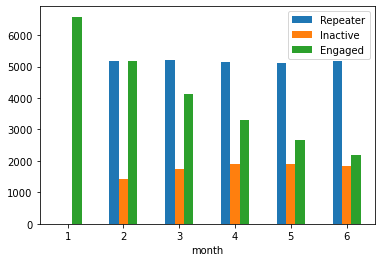

In [101]:
activity_plot = customer_activity_status.plot.bar(rot=0)

activity_plot

In [102]:
monthly_item_sales_count = pd.DataFrame(item_df[["quantity", "transaction_value"]].groupby([item_df.transaction_date.dt.month, item_df.transaction_items]).agg(sum))
monthly_item_sales_count.index.names = ["Month", "Item"]
monthly_item_sales_count.columns = ["Count", "Sales"]

monthly_item_sales_count

Count       Sales
Month Item                                               
1     Candy City,Gummy Worms             9559   1433850.0
      Candy City,Orange Beans            9774   1945026.0
      Exotic Extras,Beef Chicharon       9665  12554835.0
      Exotic Extras,Kimchi and Seaweed   9676   7731124.0
      HealthyKid 3+,Gummy Vitamins       9681  14521500.0
      HealthyKid 3+,Nutrional Milk       9727  19356730.0
      HealthyKid 3+,Yummy Vegetables     9959   4979500.0
2     Candy City,Gummy Worms             9996   1499400.0
      Candy City,Orange Beans           10037   1997363.0
      Exotic Extras,Beef Chicharon      10001  12991299.0
      Exotic Extras,Kimchi and Seaweed   9949   7949251.0
      HealthyKid 3+,Gummy Vitamins       9980  14970000.0
      HealthyKid 3+,Nutrional Milk       9691  19285090.0
      HealthyKid 3+,Yummy Vegetables    10256   5128000.0
3     Candy City,Gummy Worms             9986   1497900.0
      Candy City,Orange Beans            9611   1912589.0
      Exotic Extras,Beef Chicharon       9816  12750984.0
      Exotic Extras,Kimchi and Seaweed   9967   7963633.0
      HealthyKid 3+,Gummy Vitamins      10145  15217500.0
      HealthyKid 3+,Nutrional Milk       9876  19653240.0
      HealthyKid 3+,Yummy Vegetables     9896   4948000.0
4     Candy City,Gummy Worms            10043   1506450.0
      Candy City,Orange Beans            9914   1972886.0
      Exotic Extras,Beef Chicharon       9890  12847110.0
      Exotic Extras,Kimchi and Seaweed   9921   7926879.0
      HealthyKid 3+,Gummy Vitamins       9842  14763000.0
      HealthyKid 3+,Nutrional Milk       9786  19474140.0
      HealthyKid 3+,Yummy Vegetables     9861   4930500.0
5     Candy City,Gummy Worms             9801   1470150.0
      Candy City,Orange Beans            9964   1982836.0
      Exotic Extras,Beef Chicharon      10028  13026372.0
      Exotic Extras,Kimchi and Seaweed   9773   7808627.0
      HealthyKid 3+,Gummy Vitamins       9948  14922000.0
      HealthyKid 3+,Nutrional Milk       9881  19663190.0
      HealthyKid 3+,Yummy Vegetables     9735   4867500.0
6     Candy City,Gummy Worms             9934   1490100.0
      Candy City,Orange Beans           10106   2011094.0
      Exotic Extras,Beef Chicharon       9902  12862698.0
      Exotic Extras,Kimchi and Seaweed  10104   8073096.0
      HealthyKid 3+,Gummy Vitamins       9980  14970000.0
      HealthyKid 3+,Nutrional Milk       9767  19436330.0
      HealthyKid 3+,Yummy Vegetables     9722   4861000.0

array([<AxesSubplot:title={'center':'Count'}, xlabel='Month,Item'>,
       <AxesSubplot:title={'center':'Sales'}, xlabel='Month,Item'>],
      dtype=object)

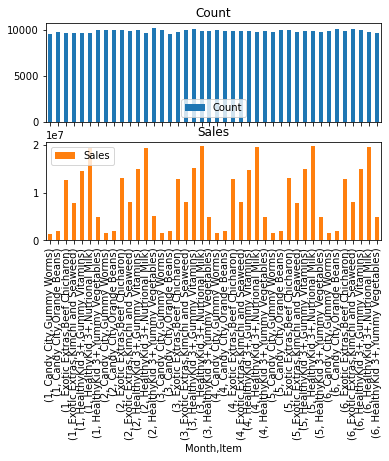

In [103]:
sales_plot = monthly_item_sales_count.plot.bar(rot=90,subplots=True)

sales_plot